In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import prophet
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
col_list=["date","new_cases","positive_rate"]
dataset = pd.read_csv("new cases dataset.csv",usecols=col_list)
dataset.describe()

,new_cases,positive_rate
count,500.000000,500.000000
mean,204.206000,0.068814
std,296.233164,0.061634
min,0.000000,0.000000
25%,0.000000,0.023000
50%,89.000000,0.045000
75%,281.250000,0.100000
max,1583.000000,0.319000


In [7]:
my_df_final = dataset.reset_index()[['date','new_cases']].rename({'date':'ds','new_cases':'y'} , axis='columns')

In [8]:
my_df_final

,ds,y
0,2020-03-14,3.0
1,2020-03-15,3.0
2,2020-03-16,0.0
3,2020-03-17,1.0
4,2020-03-18,0.0
...,...,...
495,2021-07-22,0.0
496,2021-07-23,1090.0
497,2021-07-24,497.0
498,2021-07-25,423.0


In [9]:
train= my_df_final.iloc[:-50]
test= my_df_final.iloc[-50:]
print(train.shape,test.shape)

(450, 2) (50, 2)


In [10]:
train

,ds,y
0,2020-03-14,3.0
1,2020-03-15,3.0
2,2020-03-16,0.0
3,2020-03-17,1.0
4,2020-03-18,0.0
...,...,...
445,2021-06-02,0.0
446,2021-06-03,0.0
447,2021-06-04,177.0
448,2021-06-05,0.0


In [14]:
from prophet import Prophet

In [15]:
m= Prophet(interval_width=0.95)

In [16]:
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
m.params

{'k': array([[0.06213904]]),
 'm': array([[0.12542571]]),
 'delta': array([[-1.91983768e-08,  5.27362645e-09,  7.96182705e-09,
          3.97148720e-09, -6.94198283e-09, -2.81108941e-08,
         -1.42164725e-02, -2.35947524e-02, -2.09057080e-02,
         -1.42018598e-02, -1.29186262e-03, -4.46328477e-09,
          1.03620383e-08,  3.15638824e-08, -9.14192285e-09,
         -1.85665619e-09, -8.40371780e-09, -2.18103803e-09,
         -1.51946953e-09, -1.51153453e-06, -1.34809462e-02,
         -2.70598901e-02, -3.30128331e-02, -2.79925717e-02,
         -1.63570112e-02]]),
 'sigma_obs': array([[0.18873492]]),
 'beta': array([[ 0.01010882, -0.00776634, -0.01008312,  0.00195287, -0.00260368,
         -0.00599316]]),
 'trend': array([[0.12542571, 0.12556411, 0.1257025 , 0.1258409 , 0.12597929,
         0.12611769, 0.12625608, 0.12639447, 0.12653287, 0.12667126,
         0.12680966, 0.12694805, 0.12708645, 0.12722484, 0.12736323,
         0.12750163, 0.12764002, 0.12777842, 0.12791681, 0.12805

In [25]:
future = m.make_future_dataframe(periods=50)
future.tail()

,ds
495,2021-07-22
496,2021-07-23
497,2021-07-24
498,2021-07-25
499,2021-07-26


In [26]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
495,2021-07-22,122.756090,-456.754800,697.095758
496,2021-07-23,136.343606,-454.700438,747.516244
497,2021-07-24,160.313708,-430.515842,755.838077
498,2021-07-25,170.590503,-370.850257,714.298816
499,2021-07-26,139.324059,-473.423769,705.554609


In [24]:
future

,ds
0,2020-03-14
1,2020-03-15
2,2020-03-16
3,2020-03-17
4,2020-03-18
...,...
495,2021-07-22
496,2021-07-23
497,2021-07-24
498,2021-07-25


<AxesSubplot:xlabel='ds'>

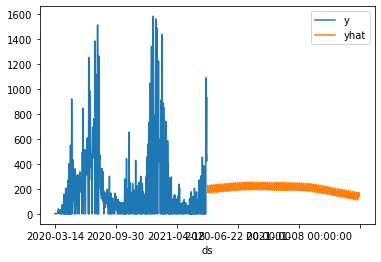

In [20]:
pd.concat([my_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [27]:
from sklearn.metrics import mean_absolute_error
mae_new_cases=mean_absolute_error(my_df_final['y'],forecast['yhat'])
print('Mean absolute error of new cases is:',mae_new_cases)

Mean absolute error of new cases is: 208.97767530279552
